# Two-Body-Problem Circle Orbit Demo

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

- [header file](https://github.com/Mephisto-000/ICMS/blob/main/Numerical/binary_body/Func.h)
- [cpp file](https://github.com/Mephisto-000/ICMS/blob/main/Numerical/binary_body/Func.cpp)
- [RK4 main file](https://github.com/Mephisto-000/ICMS/blob/main/Numerical/binary_body/main.cpp)

In [2]:
main_path = os.getcwd()
result_path = main_path + os.sep + "result.txt"

In [3]:
rt = np.loadtxt(result_path, delimiter=",")
rx, ry = [], []
vx, vy = [], []

for i in rt:
    rx.append(i[1])
    ry.append(i[2])
    vx.append(i[3])
    vy.append(i[4])

for i, j, m, n in zip(rx, ry, vx, vy):
    print(i, j, m, n)

10.0 0.0 0.0 8.1670068
8.68712072 4.90177302 -4.08334699 7.0947774
5.09581401 8.5164588 -7.09450564 4.16175477
0.168728855 9.89620294 -8.24388038 0.13780097
-4.80133515 8.67965802 -7.23045625 -3.92125368
-8.51064059 5.18661819 -4.3206329 -6.95064595
-9.98650598 0.333954998 -0.278196099 -8.15598622
-8.84236941 -4.60504782 3.8361646 -7.22156911
-5.37903734 -8.33478942 6.94316875 -4.39306345
-0.505599588 -9.8772142 8.2280621 -0.412923527
4.49919747 -8.82828866 7.35427074 3.67449763
8.32248241 -5.46383646 4.55156533 6.79697704
9.96165453 -0.667008717 0.555641402 8.13569003
8.98730114 4.30353842 -3.58499681 7.33993495
5.65569021 8.1439068 -6.78415691 4.61900603
0.841368926 9.84700112 -8.20289356 0.687146574
-4.19240463 8.9666287 -7.46951279 -3.42393971
-8.12513514 5.73439701 -4.77695165 -6.63580339
-9.92549167 0.998783087 -0.832020962 -8.10615579
-9.12176685 -3.9975958 3.33013599 -7.44975319
-5.92546764 -7.9440428 6.61766326 -4.83933345
-1.17565602 -9.80561563 8.16841801 -0.960159067
3.8813

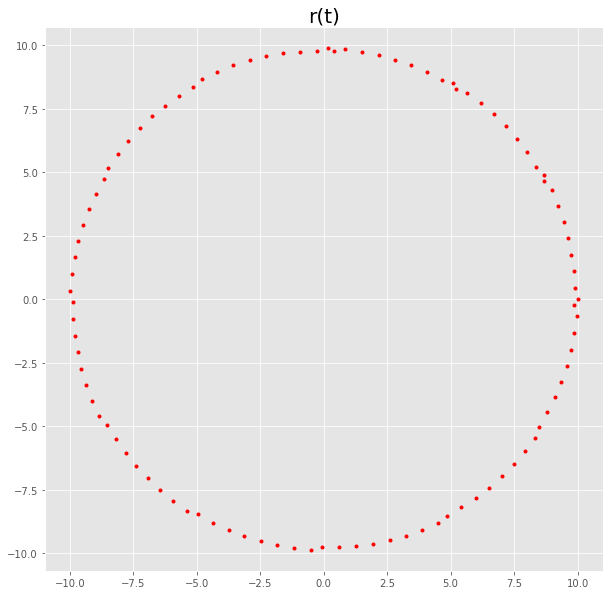

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
plt.plot(rx, ry, "r.")
plt.title("r(t)", fontsize=20)
plt.axis("equal")
plt.show()

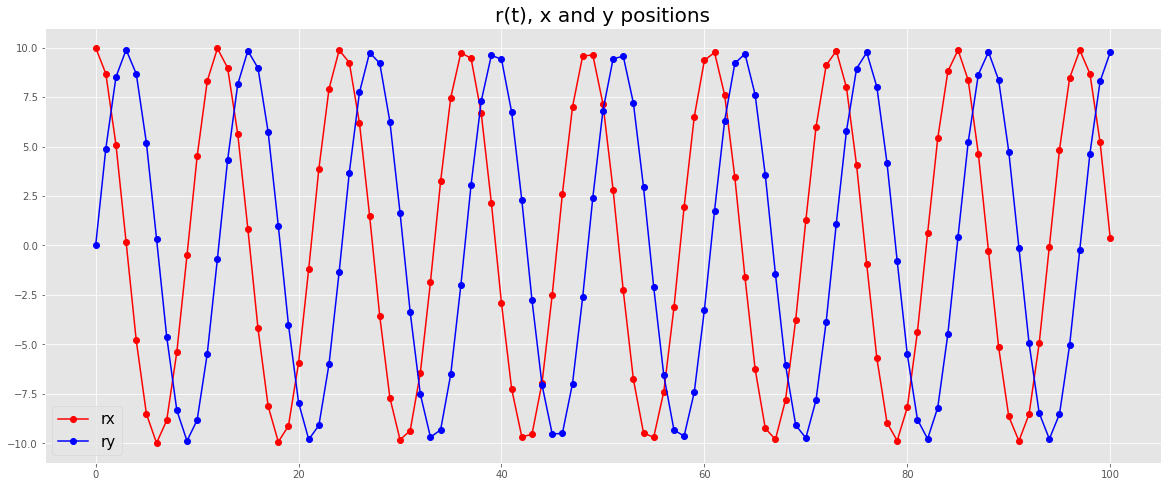

In [5]:
x_len = [i for i in range(len(rx))]
y_len = [i for i in range(len(ry))]
plt.figure(figsize=(20, 8))
plt.plot(x_len, rx, "r-o", label="rx")
plt.plot(y_len, ry, "b-o", label="ry")
plt.title("r(t), x and y positions", fontsize=20)
plt.legend(fontsize=15)
plt.show()